In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [10]:
train_df=pd.read_csv('/content/drive/My Drive/ECG/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/drive/My Drive/ECG/mitbih_test.csv',header=None)

In [11]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


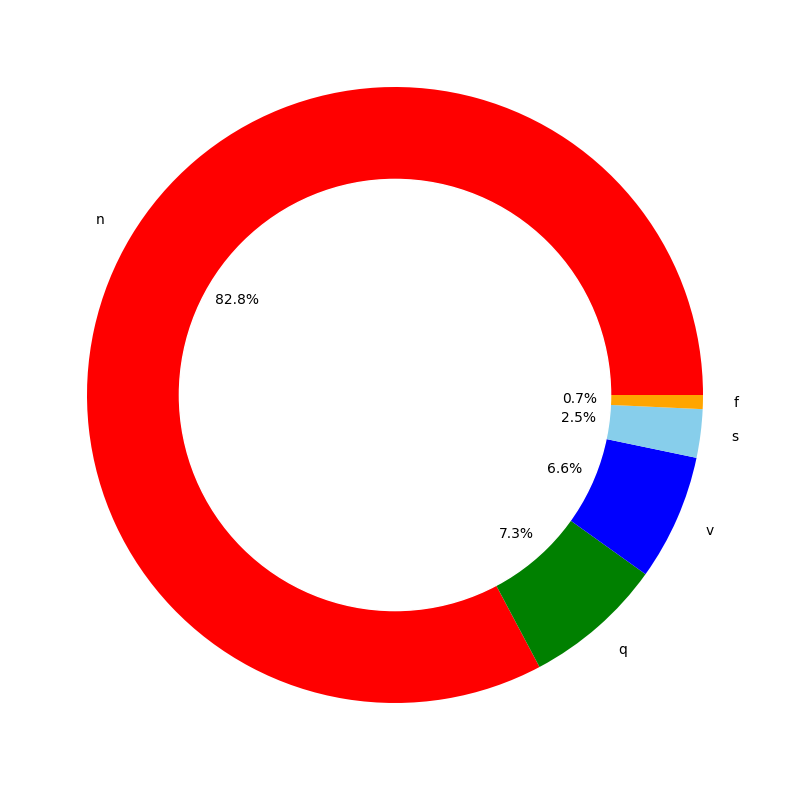

In [12]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [13]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [14]:
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


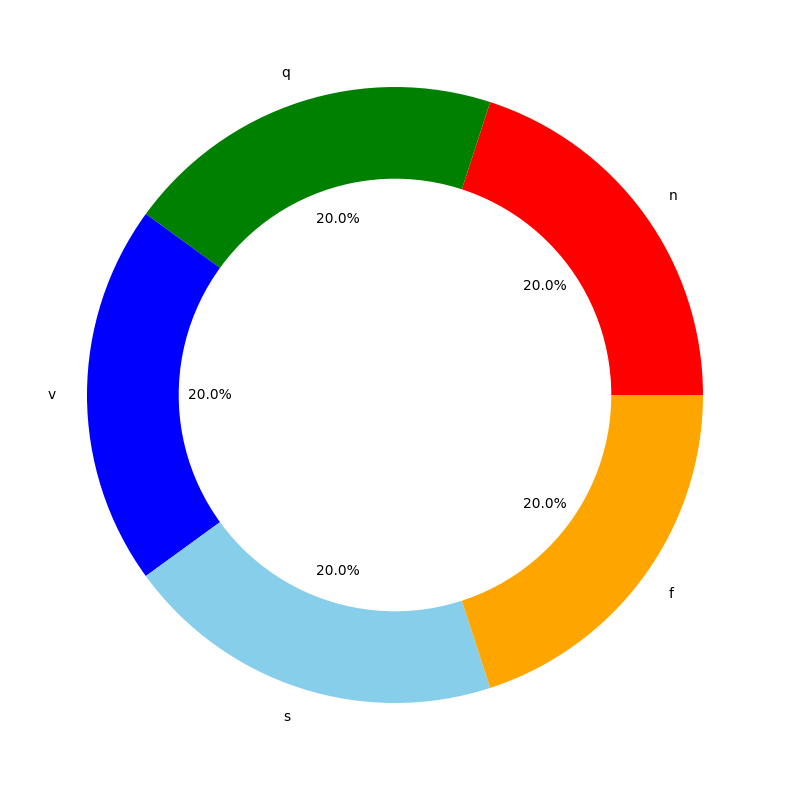

In [15]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [17]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
25926,0.825516,0.754221,0.570356,0.369606,0.153846,0.031895,0.030019,0.063790,0.069418,0.073171,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
74223,1.000000,0.860465,0.220930,0.015504,0.073643,0.151163,0.120155,0.162791,0.205426,0.205426,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1
77164,0.990544,1.000000,0.965721,0.923168,0.921986,0.887707,0.789598,0.645390,0.404255,0.284870,...,0.304965,0.310875,0.312057,0.307329,0.307329,0.317967,0.319149,0.316785,0.0,2
80628,1.000000,0.854430,0.421941,0.200422,0.177215,0.158228,0.166667,0.149789,0.149789,0.141350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3
84143,0.861004,0.513514,0.536680,0.540541,0.528958,0.513514,0.501930,0.428571,0.305019,0.177606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4


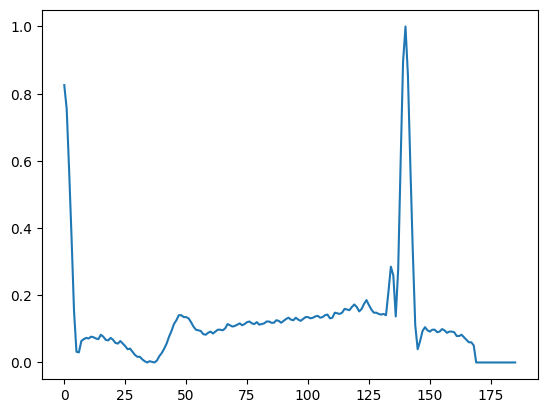

In [18]:
 plt.plot(c.iloc[0,:186])

In [19]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


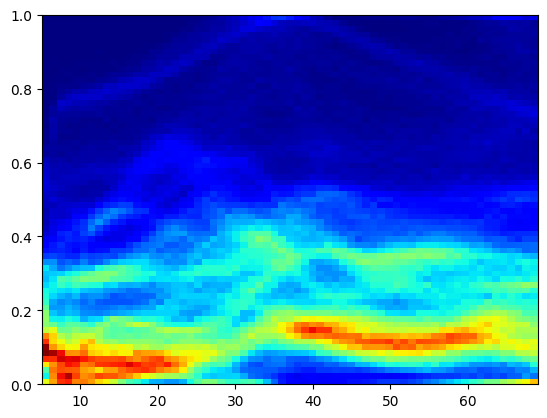

In [20]:
plot_hist(0,70,5,65)

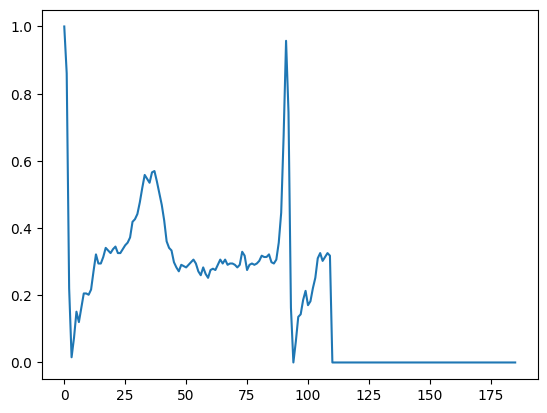

In [21]:
 plt.plot(c.iloc[1,:186])

900000
900000


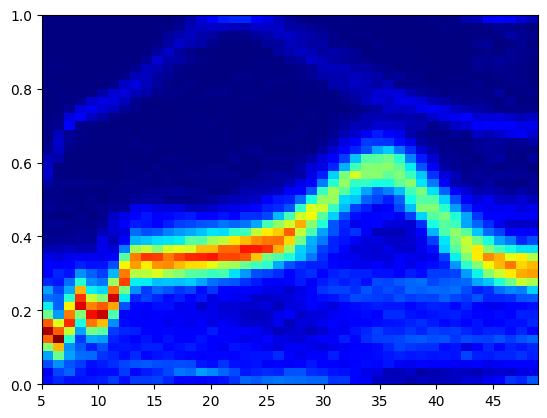

In [22]:
plot_hist(1,50,5,45)

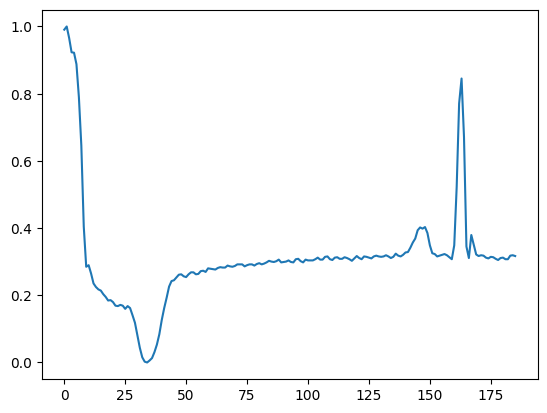

In [23]:
 plt.plot(c.iloc[2,:186])

900000
900000


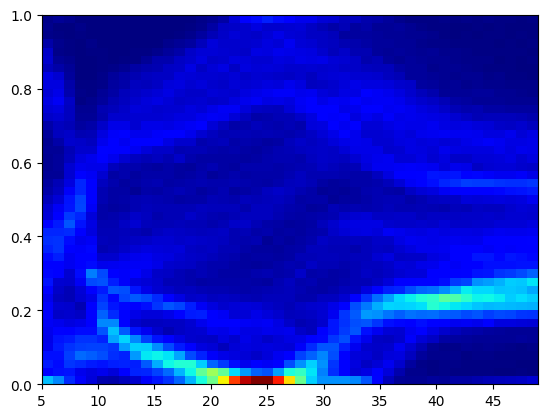

In [24]:
plot_hist(2,50,5,45)

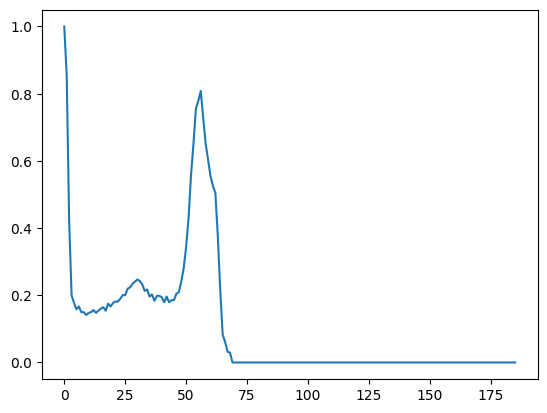

In [25]:
plt.plot(c.iloc[3,:186])

900000
900000


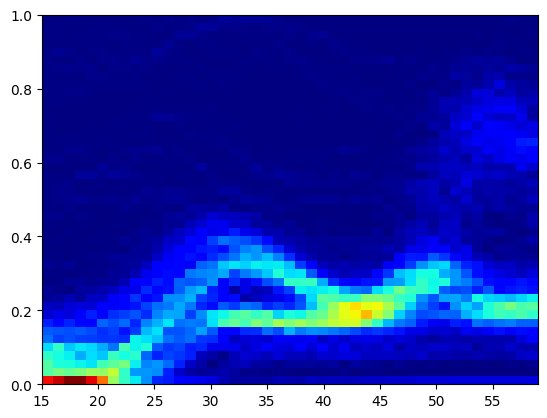

In [26]:
plot_hist(3,60,15,45)

In [27]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

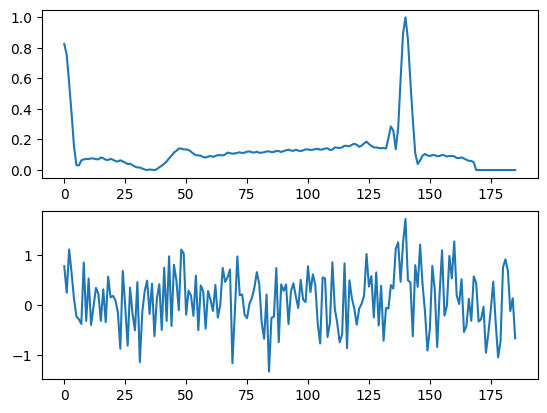

In [28]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [29]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [30]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [60]:
def network(X_train, y_train, X_test, y_test):
    im_shape = (X_train.shape[1], 1)
    inputs_cnn = Input(shape=(im_shape), name='inputs_cnn')
    conv1_1 = Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1 = BatchNormalization()(conv1_1)
    pool1 = MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1 = Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1 = BatchNormalization()(conv2_1)
    pool2 = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1 = Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1 = BatchNormalization()(conv3_1)
    pool3 = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten = Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs=inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=8),
        ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)
    ]

    history = model.fit(X_train, y_train, epochs=40, callbacks=callbacks, batch_size=32, validation_data=(X_test, y_test))
    model.load_weights('best_model.keras')  # Updated to load from 'best_model.keras'
    return model, history


In [61]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']

    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [62]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Update the load_weights line
# Call the network function to get the model and history
model, history = network(X_train, y_train, X_test, y_test)

Epoch 1/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 118s 36ms/step - accuracy: 0.6109 - loss: 0.9941 - val_accuracy: 0.4958 - val_loss: 1.1877
Epoch 2/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 108s 34ms/step - accuracy: 0.6989 - loss: 0.7947 - val_accuracy: 0.5904 - val_loss: 0.9491
Epoch 3/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 112s 36ms/step - accuracy: 0.7099 - loss: 0.7655 - val_accuracy: 0.4295 - val_loss: 1.0838
Epoch 4/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 109s 35ms/step - accuracy: 0.7246 - loss: 0.7240 - val_accuracy: 0.1898 - val_loss: 1.4297
Epoch 5/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 144s 35ms/step - accuracy: 0.7327 - loss: 0.7059 - val_accuracy: 0.4868 - val_loss: 1.1048
Epoch 6/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 138s 34ms/step - accuracy: 0.7465 - loss: 0.6769 - val_accuracy: 0.1390 - val_loss: 1.5040
Epoch 7/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 106s 34ms/step - accuracy: 0.7571 - loss: 0.6451 - val_accuracy: 0.4272 - val_loss: 1.0873
Epoch 8/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 144s 35ms/step - accuracy: 

Accuracy: 79.08%


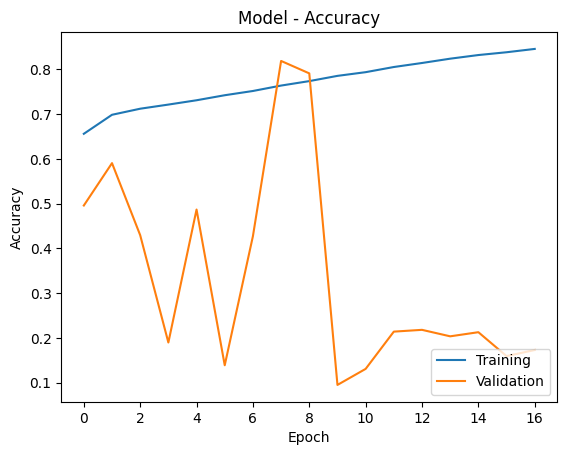

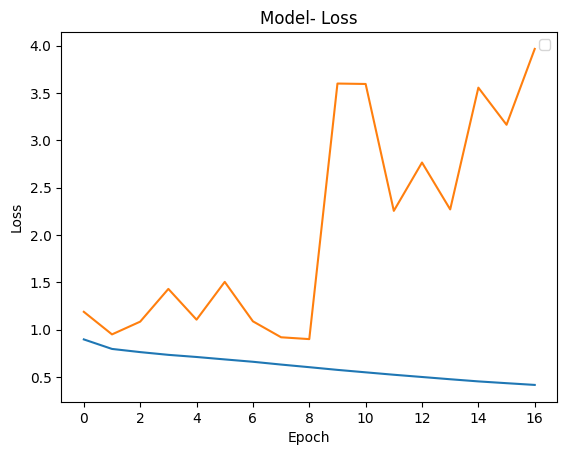

685/685 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step


In [63]:
evaluate_model(history, X_test, y_test, model)

In [64]:
y_pred=model.predict(X_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


Normalized confusion matrix


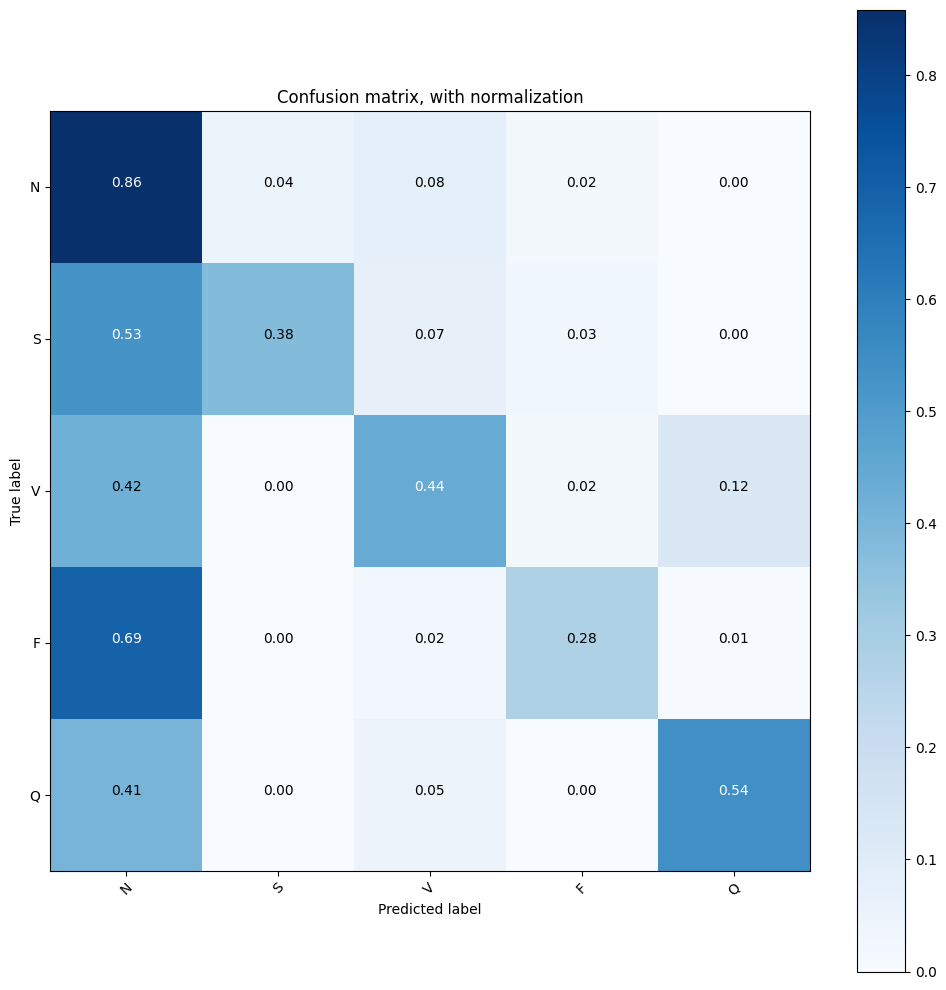

In [65]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()
